In [1]:
from transformato import load_config_yaml, SystemStructure, ProposeMutationRoute, IntermediateStateFactory
import parmed as pm
import copy
import numpy as np
import shutil

# read in specific topology with parameters
from parmed.charmm.parameters import CharmmParameterSet
def read_params(output_file_base):
    extlist = ['rtf', 'prm', 'str']
    print(output_file_base)
    parFiles = ()
    toppar_file = f"{output_file_base}/toppar.str"
    for line in open(toppar_file, 'r'):
        if '!' in line: line = line.split('!')[0]
        parfile = line.strip()
        if len(parfile) != 0:
            ext = parfile.lower().split('.')[-1]
            if not ext in extlist: continue
            parFiles += ( f"{output_file_base}/{parfile}", )

    params = CharmmParameterSet( *parFiles )
    return params

def generate_psf(output_file_base, env):
    parms = read_params(output_file_base)  
    target_psf = pm.charmm.CharmmPsfFile(f"{output_file_base}/lig_in_{env}.psf")
    target_psf.load_parameters(parms)
    return target_psf


/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/transformato-0.0.0+39.g9492d86.dirty-py3.6.egg/transformato/utils.py:17: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  settingsMap = yaml.load(stream)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:905: UserWarning: LONEPAIR type COLINEAR not supported; only BISEctor and RELAtive supported
  'RELAtive supported' % words[1])
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:832: UserWarning: No charge for WEI3
  warnings.warn('No charge for %s' % resname)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:867: UserWarning: WARNING: Ignoring "DELETE ACCE NE2" because entity type ACCE not used.
  'used.' % (line.strip(), entity_type))
/home/mwieder/anaconda3/en

[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 300.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C12 [4826]; In BMI 303>--<Atom N4 [4829]; In BMI 303>; type=<BondType; k=400.000, req=1.380>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 400.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C12 [4826]; In BMI 303>--<Atom C16 [4832]; In BMI 303>; type=<BondType; k=410.000, req=1.360>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 410.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C12 [4826]; In BMI 303>--<Atom H11 [4851]; In BMI 303>; type=<BondType; k=375.000, req=1.083>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 375.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C13 [4827]; In BMI 303>--<Atom C14 [4828]; In BMI 303>; type=<BondTy

[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom N1 [2]; In BMI 0>--<Atom H1 [30]; In BMI 0>; type=<BondType; k=447.800, req=1.019>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 447.8
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom N2 [3]; In BMI 0>--<Atom C4 [6]; In BMI 0>; type=<BondType; k=302.000, req=1.343>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 302.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom N2 [3]; In BMI 0>--<Atom H2 [31]; In BMI 0>; type=<BondType; k=474.000, req=1.010>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 474.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C2 [4]; In BMI 0>--<Atom C3 [5]; In BMI 0>; type=<BondType; k=420.000, req=1.350>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 420.0
[system.py:165 - _

[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 400.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C16 [21]; In BMI 0>--<Atom H14 [43]; In BMI 0>; type=<BondType; k=375.000, req=1.083>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 375.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C17 [22]; In BMI 0>--<Atom N7 [25]; In BMI 0>; type=<BondType; k=310.000, req=1.365>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 310.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C17 [22]; In BMI 0>--<Atom C19 [26]; In BMI 0>; type=<BondType; k=360.000, req=1.385>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 360.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom N6 [23]; In BMI 0>--<Atom C18 [24]; In BMI 0>; type=<BondType; k=320.000, req=1.374>>
[syste

[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 360.5
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C6 [4699]; In UNK 295>--<Atom C10 [4703]; In UNK 295>; type=<BondType; k=230.000, req=1.490>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 230.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C6 [4699]; In UNK 295>--<Atom H9 [4725]; In UNK 295>; type=<BondType; k=309.000, req=1.111>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 309.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C6 [4699]; In UNK 295>--<Atom H10 [4726]; In UNK 295>; type=<BondType; k=309.000, req=1.111>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 309.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C7 [4700]; In UNK 295>--<Atom C8 [4701]; In UNK 295>; type=<BondType; k

[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 322.0
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C1 [0]; In UNK 0>--<Atom C2 [1]; In UNK 0>; type=<BondType; k=222.500, req=1.538>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 222.5
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C1 [0]; In UNK 0>--<Atom N2 [3]; In UNK 0>; type=<BondType; k=263.000, req=1.474>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 263.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C1 [0]; In UNK 0>--<Atom C12 [14]; In UNK 0>; type=<BondType; k=365.000, req=1.502>>
[system.py:166 - _determine_offset_and_

[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 305.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C13 [15]; In UNK 0>--<Atom H15 [39]; In UNK 0>; type=<BondType; k=340.000, req=1.080>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 340.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C14 [16]; In UNK 0>--<Atom C15 [17]; In UNK 0>; type=<BondType; k=300.000, req=1.360>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 300.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C14 [16]; In UNK 0>--<Atom H16 [40]; In UNK 0>; type=<BondType; k=340.000, req=1.080>>
[system.py:166 - _determine_offset_and_set_possible_dummy_properties()] 340.0
[system.py:165 - _determine_offset_and_set_possible_dummy_properties()] <Bond <Atom C15 [17]; In UNK 0>--<Atom N5 [20]; In UNK 0>; type=<BondType; k=310.000, req=1.365>>
[syst

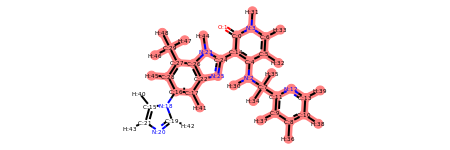

[mutate.py:107 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 19, 18, 21, 17, 20, 16, 15, 23, 22, 24, 43, 44, 45, 42, 40, 41, 2, 7, 11, 9, 8, 10, 13, 12, 38, 37, 35, 36, 33, 34, 29, 31, 32, 30)


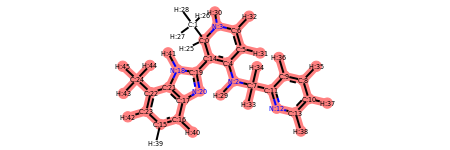

[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: [H]C1=C([H])N([H])C([H])(C([H])([H])[H])C(c2nc3c([H])c([H])c([H])c(C([H])([H])[H])c3n2[H])=C1N([H])C([H])([H])c1nc([H])c([H])c([H])c1[H].
[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: [H]c1nc(C([H])([H])N([H])c2c([H])c([H])n([H])c(=O)c2-c2nc3c([H])c(-n4c([H])nc([H])c4[H])c([H])c(C([H])([H])[H])c3n2[H])c([H])c([H])c1[H].
[mutate.py:98 - _calculate_common_core()] Substructure match: [#6]1-,:[#7](-,:[#6](=,:[#6](-,:[#6](=,:[#6]-,:1-[#6]1:[#7](:[#6]2:[#6](:[#7]:1):[#6](:[#6]:[#6](:[#6]:2-[#6](-[#1])(-[#1])-[#1])-[#1])-[#1])-[#1])-[#7](-[#6](-[#6]1:[#6](:[#6](:[#6](:[#6](:[#7]:1)-[#1])-[#1])-[#1])-[#1])(-[#1])-[#1])-[#1])-[#1])-[#1])-[#1]
[mutate.py:104 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 19, 18, 21, 17, 20, 16, 15, 23, 22, 24, 43, 44, 45, 42, 40, 41, 2, 7, 11, 9, 8, 10, 13, 12, 38, 37, 35, 36, 33, 34, 29, 31, 32, 30)


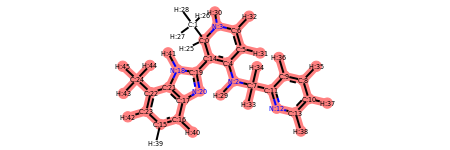

[mutate.py:107 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 24, 23, 26, 22, 25, 17, 16, 28, 27, 29, 46, 47, 48, 45, 41, 44, 2, 7, 11, 9, 8, 10, 13, 12, 39, 38, 36, 37, 34, 35, 30, 32, 33, 31)


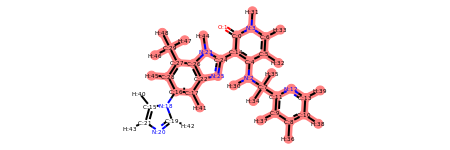

[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:1 Element:O
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:15 Element:C
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:18 Element:N
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:19 Element:C
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:20 Element:N
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:21 Element:C
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:40 Element:H
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:42 Element:H
[mutate.py:251 - _mutate_to_common_core()] Will be decoupled: Idx:43 Element:H
[mutate.py:215 - _transform_common_core()] ###########
[mutate.py:216 - _transform_common_core()] Atom that needs to be transformed: <Atom C1 [0]; In BMI 0>.
[mutate.py:217 - _transform_common_core()] Atom type of atom in cc1: CG2R63.
[mutate.py:218 - _transform_common_core()] Template ato

[mutate.py:468 - mutate()] New epsilon: -0.079
[mutate.py:471 - mutate()] Real rmin: 1.9
[mutate.py:473 - mutate()] New rmin: 1.9949999999999999
[mutate.py:476 - mutate()] Old charge: -0.043
[mutate.py:478 - mutate()] New charge: 0.1215
[mutate.py:543 - _modify_type()] Setting RRR atomtype for atom: <Atom H2 [4842]; In BMI 303>.
[mutate.py:461 - mutate()] Modifying atom: <Atom H2 [4842]; In BMI 303>
[mutate.py:462 - mutate()] Template atom: <Atom H6 [30]; In UNK 0>
[mutate.py:463 - mutate()] Scaling VdW + charge
[mutate.py:466 - mutate()] Real epsilon: -0.046
[mutate.py:468 - mutate()] New epsilon: -0.0275
[mutate.py:471 - mutate()] Real rmin: 0.2245
[mutate.py:473 - mutate()] New rmin: 0.54975
[mutate.py:476 - mutate()] Old charge: 0.287
[mutate.py:478 - mutate()] New charge: 0.3235
[mutate.py:543 - _modify_type()] Setting RRR atomtype for atom: <Atom H3 [4843]; In BMI 303>.
[mutate.py:461 - mutate()] Modifying atom: <Atom H3 [4843]; In BMI 303>
[mutate.py:462 - mutate()] Template ato

[mutate.py:489 - mutate()] Target k: 360.5
[mutate.py:491 - mutate()] 355.25
[mutate.py:493 - mutate()] New k: 355.25
[mutate.py:496 - mutate()] [350.0, 355.25]
[mutate.py:497 - mutate()] 1
[mutate.py:500 - mutate()] Old req: 1.09
[mutate.py:502 - mutate()] New req: 1.0950000000000002
[mutate.py:506 - mutate()] Modifying angle: <Angle <Atom N2 [4814]; In BMI 303>--<Atom C1 [4811]; In BMI 303>--<Atom C11 [4825]; In BMI 303>; type=<AngleType; k=70.000, theteq=113.500>>
[mutate.py:507 - mutate()] Template bond: <Angle <Atom N2 [3]; In UNK 0>--<Atom C1 [0]; In UNK 0>--<Atom C12 [14]; In UNK 0>; type=<AngleType; k=57.000, theteq=107.000>>
[mutate.py:508 - mutate()] Scaling k and theteq
[mutate.py:510 - mutate()] Old k: 70.0
[mutate.py:513 - mutate()] New k: 63.5
[mutate.py:515 - mutate()] Old k: 113.5
[mutate.py:517 - mutate()] New k: 110.25
[mutate.py:506 - mutate()] Modifying angle: <Angle <Atom C1 [4811]; In BMI 303>--<Atom N2 [4814]; In BMI 303>--<Atom C4 [4817]; In BMI 303>; type=<Angl

[mutate.py:476 - mutate()] Old charge: -0.167
[mutate.py:478 - mutate()] New charge: -0.36050000000000004
[mutate.py:543 - _modify_type()] Setting RRR atomtype for atom: <Atom C2 [4]; In BMI 0>.
[mutate.py:461 - mutate()] Modifying atom: <Atom C2 [4]; In BMI 0>
[mutate.py:462 - mutate()] Template atom: <Atom C3 [4]; In UNK 0>
[mutate.py:463 - mutate()] Scaling VdW + charge
[mutate.py:466 - mutate()] Real epsilon: -0.09
[mutate.py:468 - mutate()] New epsilon: -0.079
[mutate.py:471 - mutate()] Real rmin: 1.9
[mutate.py:473 - mutate()] New rmin: 1.9949999999999999
[mutate.py:476 - mutate()] Old charge: 0.097
[mutate.py:478 - mutate()] New charge: 0.0495
[mutate.py:543 - _modify_type()] Setting RRR atomtype for atom: <Atom C3 [5]; In BMI 0>.
[mutate.py:461 - mutate()] Modifying atom: <Atom C3 [5]; In BMI 0>
[mutate.py:462 - mutate()] Template atom: <Atom C4 [5]; In UNK 0>
[mutate.py:463 - mutate()] Scaling VdW + charge
[mutate.py:466 - mutate()] Real epsilon: -0.09
[mutate.py:468 - mutate(

[mutate.py:497 - mutate()] 1
[mutate.py:500 - mutate()] Old req: 1.35
[mutate.py:502 - mutate()] New req: 1.3450000000000002
[mutate.py:482 - mutate()] 0.5
[mutate.py:483 - mutate()] Modifying bond: <Bond <Atom C3 [5]; In BMI 0>--<Atom C4 [6]; In BMI 0>; type=<BondType; k=420.000, req=1.350>>
[mutate.py:484 - mutate()] Template bond: <Bond <Atom C4 [5]; In UNK 0>--<Atom C5 [6]; In UNK 0>; type=<BondType; k=440.000, req=1.340>>
[mutate.py:485 - mutate()] Scaling k and req
[mutate.py:486 - mutate()] Original value for k: 420.0
[mutate.py:488 - mutate()] Old k: 420.0
[mutate.py:489 - mutate()] Target k: 440.0
[mutate.py:491 - mutate()] 430.0
[mutate.py:493 - mutate()] New k: 430.0
[mutate.py:496 - mutate()] [420.0, 430.0]
[mutate.py:497 - mutate()] 1
[mutate.py:500 - mutate()] Old req: 1.35
[mutate.py:502 - mutate()] New req: 1.3450000000000002
[mutate.py:482 - mutate()] 0.5
[mutate.py:483 - mutate()] Modifying bond: <Bond <Atom C3 [5]; In BMI 0>--<Atom H3 [32]; In BMI 0>; type=<BondType;

[mutate.py:513 - mutate()] New k: 42.0
[mutate.py:515 - mutate()] Old k: 119.0
[mutate.py:517 - mutate()] New k: 119.5
[mutate.py:506 - mutate()] Modifying angle: <Angle <Atom C1 [0]; In BMI 0>--<Atom C11 [14]; In BMI 0>--<Atom C2 [4]; In BMI 0>; type=<AngleType; k=120.000, theteq=116.700>>
[mutate.py:507 - mutate()] Template bond: <Angle <Atom C1 [0]; In UNK 0>--<Atom C12 [14]; In UNK 0>--<Atom C3 [4]; In UNK 0>; type=<AngleType; k=43.500, theteq=126.500>>
[mutate.py:508 - mutate()] Scaling k and theteq
[mutate.py:510 - mutate()] Old k: 120.0
[mutate.py:513 - mutate()] New k: 81.75
[mutate.py:515 - mutate()] Old k: 116.7
[mutate.py:517 - mutate()] New k: 121.6
[state.py:207 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:208 - _write_rtf_file()]   + Atom-Name: C1
[state.py:209 - _write_rtf_file()]   + Atom-Type: RRR0
[state.py:210 - _write_rtf_file()]   + Atom Dummy Type: RRR0
[state.py:207 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:208 - _write_rtf_fi

[state.py:266 - _write_prm_file()] NG311   RRR2    RRR3     40.00000 120.00000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle parameters for: NG311-RRR2-RRR5
[state.py:266 - _write_prm_file()] NG311   RRR2    RRR5     40.00000 120.00000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR3-RRR2-RRR5
[state.py:266 - _write_prm_file()] RRR3    RRR2    RRR5     44.00000 119.00000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR2-RRR3-RRR4
[state.py:266 - _write_prm_file()] RRR2    RRR3    RRR4     44.00000 119.00000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR2-RRR3-RRR7
[state.py:266 - _write_prm_file()] RRR2    RRR3    RRR7     42.00000 119.50000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR4-RRR3-RRR7
[state.py:266 - _write_prm_file()] RRR4    RRR3    RRR7     42.00000 119.50000 

[state.py:264 - _write_prm_file()]  >> Setting dummy angle para

/home/mwieder/Work/Projects/transformato/notebooks/2OJ9/intst1/


/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:825: ParameterWarning: Replacing residue ETHA
  warnings.warn('Replacing residue {}'.format(resname), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:825: ParameterWarning: Replacing residue FETH
  warnings.warn('Replacing residue {}'.format(resname), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:825: ParameterWarning: Replacing residue DFET
  warnings.warn('Replacing residue {}'.format(resname), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/li

/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('CG2R61', 'CG321', 'NG311'), <AngleType; k=57.000, theteq=107.000> with <AngleType; k=73.000, theteq=109.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:557: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.000, per=2, phase=0.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=1.000, per=2, phase=180.000,  scee=1.000, scnb=1.000>
  ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:557: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.160, per=3, phase=0.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.300, per=3, phase=0.000,  scee=1.000, scnb=1.000>
  ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packa

/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('CG331', 'CG2D1', 'CG331'), <AngleType; k=55.000, theteq=119.000> with <AngleType; k=48.000, theteq=123.500>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:557: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.900, per=1, phase=180.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.140, per=1, phase=180.000,  scee=1.000, scnb=1.000>
  ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-packages/parmed/charmm/parameters.py:557: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=3, phase=180.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.050, per=3, phase=180.000,  scee=1.000, scnb=1.000>
  ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.6/site-

<Bond <Atom C1 [0]; In BMI 0>--<Atom N2 [3]; In BMI 0>; type=<BondType; k=340.000, req=1.383>>
<Bond <Atom C1 [0]; In BMI 0>--<Atom N2 [3]; In BMI 0>; type=<BondType; k=301.500, req=1.429>>
<Bond <Atom C1 [0]; In UNK 0>--<Atom N2 [3]; In UNK 0>; type=<BondType; k=263.000, req=1.474>>
340.0
301.5
301.5
263.0
CG2R63
NG2R61
RRR0
RRR1
CG311
NG311
<Bond <Atom C1 [0]; In BMI 0>--<Atom C11 [14]; In BMI 0>; type=<BondType; k=302.000, req=1.403>>
<Bond <Atom C1 [0]; In BMI 0>--<Atom C11 [14]; In BMI 0>; type=<BondType; k=333.500, req=1.452>>
<Bond <Atom C1 [0]; In UNK 0>--<Atom C12 [14]; In UNK 0>; type=<BondType; k=365.000, req=1.502>>
302.0
333.5
333.5
365.0
CG2R63
CG2R62
RRR0
RRR5
CG311
CG2DC1
<Bond <Atom N2 [3]; In BMI 0>--<Atom C4 [6]; In BMI 0>; type=<BondType; k=302.000, req=1.343>>
<Bond <Atom N2 [3]; In BMI 0>--<Atom C4 [6]; In BMI 0>; type=<BondType; k=361.000, req=1.349>>
<Bond <Atom N2 [3]; In UNK 0>--<Atom C5 [6]; In UNK 0>; type=<BondType; k=420.000, req=1.355>>
302.0
361.0
361.0


AssertionError: 

In [2]:
configuration = load_config_yaml(config='../config/2oj9-test.yaml',
                input_dir='../data/', output_dir='.')
s1 = SystemStructure(configuration, 'structure1')
s2 = SystemStructure(configuration, 'structure2')

s1_to_s2 = ProposeMutationRoute(s1, s2)
s2_to_s1 = ProposeMutationRoute(s2, s1)



for a, system, template in zip([s1_to_s2], [s1], [s2]):
    original_psf_waterbox = copy.deepcopy(system.waterbox_psf)
    original_psf_complex = copy.deepcopy(system.complex_psf)
    template_psf_waterbox = copy.deepcopy(template.waterbox_psf)
    template_psf_complex = copy.deepcopy(template.complex_psf)

    mutation_list = a.generate_mutations_to_common_core_for_mol1(nr_of_steps_for_el=3, nr_of_steps_for_bonded_parameters=3)
    i = IntermediateStateFactory(system=system, mutation_list=mutation_list, configuration=configuration)

    m1 = mutation_list[-1]
    current_step = 1
    output_file_base = i.generate_specific_intermediate_state(m1, current_step)

    
    for env in ['waterbox']:
        if env == 'waterbox':
            original_psf = original_psf_waterbox
            template_psf = template_psf_waterbox
        else:
            original_psf = original_psf_complex
            template_psf = template_psf_complex
        
        new_psf = generate_psf(output_file_base, env)
        
        
        # atom names are the same in new and orginal psf
        for natom, oatom in zip(new_psf.view[f":{system.tlc.upper()}"].atoms, 
                                original_psf.view[f":{system.tlc.upper()}"].atoms):
            
            assert(natom.name== oatom.name)

        # changes are only in the ligand
        for natom, oatom in zip(new_psf.view[f"!(:{system.tlc.upper()})"].atoms, 
                                original_psf.view[f"!(:{system.tlc.upper()})"].atoms):
            
            assert(np.isclose(natom.charge, oatom.charge))
            assert(np.isclose(natom.epsilon, oatom.epsilon))
        
        
        # get mapping between original/new and template psf
        match_atom_names_cc1_to_cc2 = dict()
        cc1_offset = min([a.idx for a in original_psf.view[f":{m1.tlc_cc1.upper()}"].atoms])
        cc2_offset = min([a.idx for a in template_psf.view[f":{m1.tlc_cc2.upper()}"].atoms])
        scale = current_step/(m1.nr_of_steps - 1)

        # test atom parameters
        for cc1, cc2 in zip(m1.cc1_idx, m1.cc2_idx):
            # did atom type change? if not continue

            cc1_oidx = cc1 + cc1_offset
            cc2_oidx = cc2 + cc2_offset
            cc1_a = original_psf[cc1_oidx]
            cc2_a = template_psf[cc2_oidx]
            if cc1_a.type == cc2_a.type:
                continue
            match_atom_names_cc1_to_cc2[cc1_a.name] = cc2_a.name
                                 
            
            assert(np.isclose((1.0 - scale) * original_psf[cc1_oidx].charge + scale * template_psf[cc2_oidx].charge, 
                             new_psf[cc1_oidx].charge))
            assert(np.isclose((1.0 - scale) * original_psf[cc1_oidx].epsilon + scale * template_psf[cc2_oidx].epsilon, 
                             new_psf[cc1_oidx].epsilon))
            assert(np.isclose((1.0 - scale) * original_psf[cc1_oidx].sigma + scale * template_psf[cc2_oidx].sigma, 
                             new_psf[cc1_oidx].sigma))
            
        
        
            
        
        # get mapping between original/new and template psf
        for cc1_bond, new_bond in zip(original_psf.view[f":{m1.tlc_cc1.upper()}"].bonds, 
                                      new_psf.view[f":{m1.tlc_cc1.upper()}"].bonds):
            cc1_a1 = cc1_bond.atom1.name
            cc1_a2 = cc1_bond.atom2.name
            # all atoms of the bond must be in cc
            # everything outside the cc are bonded terms between dummies or 
            # between real atoms and dummies and we can ignore them for now
            if not all(elem in match_atom_names_cc1_to_cc2.keys() for elem in [cc1_a1, cc1_a2]):
                assert(np.isclose(cc1_bond.type.k, new_bond.type.k))
                continue

            for cc2_bond in template_psf.view[f":{m1.tlc_cc2.upper()}"].bonds:
                cc2_a1 = cc2_bond.atom1.name
                cc2_a2 = cc2_bond.atom2.name
                # all atoms of the bond must be in cc
                if not all(elem in match_atom_names_cc1_to_cc2.values() for elem in [cc2_a1, cc2_a2]):
                    continue

                # match the two bonds
                if sorted([match_atom_names_cc1_to_cc2[cc1_a1], match_atom_names_cc1_to_cc2[cc1_a2]]) == sorted([cc2_a1, cc2_a2]):
                    print(cc1_bond)
                    print(new_bond)
                    print(cc2_bond)
                    
                    print(cc1_bond.type.k)
                    print(new_bond.type.k)
                    print((1.0 - scale) * cc1_bond.type.k + scale * cc2_bond.type.k)
                    print(cc2_bond.type.k)
                    
                    print(cc1_bond.atom1.type)
                    print(cc1_bond.atom2.type)

                    print(new_bond.atom1.type)
                    print(new_bond.atom2.type)

                    
                    print(cc2_bond.atom1.type)
                    print(cc2_bond.atom2.type)
                    scaled = (1.0 - scale) * cc1_bond.type.k + scale * cc2_bond.type.k
                    assert(np.isclose(scaled, new_bond.type.k))
        
        
        
        
shutil.rmtree(output_file_base) 


In [ ]:
configuration = load_config_yaml(config='../config/2oj9-test.yaml',
                input_dir='../data/', output_dir='.')
s1 = SystemStructure(configuration, 'structure1')
#s2 = SystemStructure(configuration, 'structure2')

for b in s1.waterbox_psf.view[':BMI'].bonds:
    print(b)
    print(b.type.k)
    print(b.initial_k)


In [ ]:
die
dead
kill

In [ ]:
def _test(cc1_psf, 
          cc2_psf, 
          cc1_tlc, 
          cc2_tlc,
          cc1_idx,
         cc2_idx):

    match_atom_names_cc1_to_cc2 = {}
    # overwritting since this is done twice #NOTE: not best coding

    cc1_psf = cc1_psf
    cc2_psf = cc2_psf

    cc1_offset = min([a.idx for a in cc1_psf.view[f":{cc1_tlc.upper()}"].atoms])
    cc2_offset = min([a.idx for a in cc2_psf.view[f":{cc2_tlc.upper()}"].atoms])

    ##########################################
    # atoms matching
    for cc1, cc2 in zip(cc1_idx, cc2_idx):
        # did atom type change? if not continue
        cc1_oidx = cc1 + cc1_offset
        cc2_oidx = cc2 + cc2_offset
        cc1_a = cc1_psf[cc1_oidx]
        cc2_a = cc2_psf[cc2_oidx]
        if cc1_a.type == cc2_a.type:
            continue
        match_atom_names_cc1_to_cc2[cc1_a.name] = cc2_a.name
        psf.cc_atoms.append(cc1_a)
        self.new_atoms.append(cc2_a)

    ##########################################
    # bonds
    for cc1_bond in cc1_psf.view[f":{self.tlc_cc1.upper()}"].bonds:
        cc1_a1 = cc1_bond.atom1.name
        cc1_a2 = cc1_bond.atom2.name
        # all atoms of the bond must be in cc
        # everything outside the cc are bonded terms between dummies or 
        # between real atoms and dummies and we can ignore them for now
        if not all(elem in match_atom_names_cc1_to_cc2.keys() for elem in [cc1_a1, cc1_a2]):
                continue

        cc1_psf.cc_bonds.append(cc1_bond)
        for cc2_bond in cc2_psf.view[f":{self.tlc_cc2.upper()}"].bonds:
            cc2_a1 = cc2_bond.atom1.name
            cc2_a2 = cc2_bond.atom2.name
            # all atoms of the bond must be in cc
            if not all(elem in match_atom_names_cc1_to_cc2.values() for elem in [cc2_a1, cc2_a2]):
                continue

            # match the two bonds
            if sorted([match_atom_names_cc1_to_cc2[cc1_a1], match_atom_names_cc1_to_cc2[cc1_a2]]) == sorted([cc2_a1, cc2_a2]):
                self.new_bonds.append(cc2_bond)

    if(len(cc1_psf.cc_bonds) != len(self.new_bonds)):
        print('Old bonds: {}'.format(len(cc1_psf.cc_bonds)))
        print('New bonds: {}'.format(len(self.new_bonds)))
        raise RuntimeError('Nr of bonds is different in the common cores.')
    else:
        logger.info('Old bonds: {}'.format(len(cc1_psf.cc_bonds)))
        logger.info('New bonds: {}'.format(len(self.new_bonds)))

    ##########################################
    for cc1_angle in cc1_psf.view[f":{self.tlc_cc1.upper()}"].angles:
        cc1_a1 = cc1_angle.atom1.name
        cc1_a2 = cc1_angle.atom2.name
        cc1_a3 = cc1_angle.atom3.name
        # only angles in cc
        if not all(elem in match_atom_names_cc1_to_cc2.keys() for elem in [cc1_a1, cc1_a2, cc1_a3]):
                continue

        cc1_psf.cc_angles.append(cc1_angle)

        for cc2_angle in cc2_psf.view[f":{self.tlc_cc2.upper()}"].angles:
            cc2_a1 = cc2_angle.atom1.name
            cc2_a2 = cc2_angle.atom2.name
            cc2_a3 = cc2_angle.atom3.name
            # only angles in cc
            if not all(elem in match_atom_names_cc1_to_cc2.values() for elem in [cc2_a1, cc2_a2, cc2_a3]):
                continue

            if sorted([match_atom_names_cc1_to_cc2[cc1_a1], match_atom_names_cc1_to_cc2[cc1_a2], match_atom_names_cc1_to_cc2[cc1_a3]]) == sorted([cc2_a1, cc2_a2, cc2_a3]):
                self.new_angles.append(cc2_angle)

    if(len(cc1_psf.cc_angles) != len(self.new_angles)):
        print('Old angles: {}'.format(len(cc1_psf.cc_angles)))
        print('New angles: {}'.format(len(self.new_angles)))
        raise RuntimeError('Nr of angles is different in the common cores.')
    else:
        logger.info('Old angles: {}'.format(len(cc1_psf.cc_angles)))
        logger.info('New angles: {}'.format(len(self.new_angles)))


    ##########################################
    # torsions are treated differently
    # here we add torsions from the 
    # target topology to the starting topology and 
    # turn the starting dihedrals off and the target 
    # dihedrals on

    # get all torsions present in initial topology
    for cc1_torsion in cc1_psf.view[f":{self.tlc_cc1.upper()}"].dihedrals:
        cc1_a1 = cc1_torsion.atom1.name
        cc1_a2 = cc1_torsion.atom2.name
        cc1_a3 = cc1_torsion.atom3.name
        cc1_a4 = cc1_torsion.atom4.name
        # all atoms must be in the cc
        if not all(elem in match_atom_names_cc1_to_cc2.keys() for elem in [cc1_a1, cc1_a2, cc1_a3, cc1_a4]):
            continue

        # set identifier
        cc1_torsion.gets_modified = True
        cc1_torsion.type_cc2 = []

        # get corresponding torsion types in the new topology
        found = False
        for cc2_torsion in cc2_psf.view[f":{self.tlc_cc2.upper()}"].dihedrals:
            cc2_a1 = cc2_torsion.atom1.name
            cc2_a2 = cc2_torsion.atom2.name
            cc2_a3 = cc2_torsion.atom3.name
            cc2_a4 = cc2_torsion.atom4.name
            # only torsion in cc
            if not all(elem in match_atom_names_cc1_to_cc2.values() for elem in [cc2_a1, cc2_a2, cc2_a3, cc2_a4]):
                continue

            if sorted([match_atom_names_cc1_to_cc2[cc1_a1], match_atom_names_cc1_to_cc2[cc1_a2], match_atom_names_cc1_to_cc2[cc1_a3], match_atom_names_cc1_to_cc2[cc1_a4]]) == sorted([cc2_a1, cc2_a2, cc2_a3, cc2_a4]):
                found = True
                for torsion_t in cc2_torsion.type:
                    cc1_torsion.type_cc2.append(torsion_t)


        if found == False:
            # somehow more torsions in one scaffold as in the other ...
            raise RuntimeError('Be careful - there is an unmatched torsion present.')
